In [54]:
import numpy as np
import pyccl as ccl
import matplotlib.pyplot as plt
import scipy.integrate as integrate
#import scipy.interpolate as interpol
#from pyccl._core import UnlockInstance
#from scipy import signal
from scipy.special import erf, gamma, expn, hyp2f1, exp1

#import inspect

# Import classes

In [3]:
import Fedeli_1_separateComponents as Fedeli
Fedeli.__all__

('StellarProfileSAM', 'GasProfileSAM', 'CDMProfile')

In [4]:
import BCMprofiles_separateComponents as BCMprofiles
BCMprofiles.__all__

/Users/lambe/Documents/GitHub/Oxford-Intern-2024/Oxford-Internship-Practices/Combiner/BCMprofiles_separateComponents.py:101: SyntaxWarning: invalid escape sequence '\ '
  """Creating a class for the stellar density profile \
/Users/lambe/Documents/GitHub/Oxford-Intern-2024/Oxford-Internship-Practices/Combiner/BCMprofiles_separateComponents.py:271: SyntaxWarning: invalid escape sequence '\ '
  """Creating a class for the bound gas density profile where:


('StellarProfileBCM',
 'EjectedGasProfileBCM',
 'BoundGasProfileBCM',
 'CDMProfile')

In [5]:
import Combiner_Class as Combiner
Combiner.__all__

'CombinerClass'

In [6]:
### Set up eg- cosmo
trial_mass_def = ccl.halos.MassDef200c #hmd_200c # use a mass definition with Delta = 200
trial_concentration = ccl.halos.ConcentrationDuffy08(mass_def=trial_mass_def) # mass_def=hmd_200c) # cM
trial_cosmo = ccl.Cosmology(Omega_c = 0.25, Omega_b=0.05, h=0.7, A_s=2.1e-9, n_s=0.96, Neff=0, Omega_g=0)

trial_gamma = 1.2 
# The Tinker 2008 mass function
# hmf_200m = ccl.halos.MassFuncTinker08(mass_def=hmd_200m, mass_def_strict=False)
trial_mass_function = ccl.halos.MassFuncTinker08(mass_def=trial_mass_def, mass_def_strict=False)

trial_r = np.geomspace(1E-2,1E8,100000) # geomspace is like linspace, but evenly spaces on a logscale
trial_k = np.geomspace(1E-2,9E1,100000) # np.geomspace(1E-3,1E2,100000)
trial_M = np.array([3E12,6E13, 1E14])#/cosmo['h'] # trying with factor of h^{-1}

In [7]:
bcm_cdm_profile = BCMprofiles.CDMProfile(trial_mass_def, trial_concentration)
bcm_stel_profile = BCMprofiles.StellarProfileBCM(trial_mass_def)
bcm_ej_profile = BCMprofiles.EjectedGasProfileBCM(trial_mass_def)
bcm_bd_profile = BCMprofiles.BoundGasProfileBCM(trial_mass_def, trial_concentration, Gamma=trial_gamma)

In [8]:
fed_cdm_profile = Fedeli.CDMProfile(trial_mass_def, trial_concentration)
fed_stel_profile = Fedeli.StellarProfileSAM(trial_mass_def, trial_mass_function)
fed_gas_profile = Fedeli.GasProfileSAM(trial_mass_def)

In [9]:
help(Combiner)

Help on module Combiner_Class:

NAME
    Combiner_Class

CLASSES
    pyccl.halos.profiles.profile_base.HaloProfile(pyccl._core.schema.CCLAutoRepr)
        CombinerClass

    class CombinerClass(pyccl.halos.profiles.profile_base.HaloProfile)
     |  CombinerClass(self, prof_list)
     |
     |  Method resolution order:
     |      CombinerClass
     |      pyccl.halos.profiles.profile_base.HaloProfile
     |      pyccl._core.schema.CCLAutoRepr
     |      pyccl._core.schema.CCLObject
     |      abc.ABC
     |      builtins.object
     |
     |  Methods defined here:
     |
     |  __init__(self, prof_list)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |
     |  update_parameters(self, **kwargs)
     |
     |  ----------------------------------------------------------------------
     |  Data and other attributes defined here:
     |
     |  __abstractmethods__ = frozenset()
     |
     |  __annotations__ = {}
     |
     |  __signature__ = <Signature (

## Try Combinations

In [21]:
# update_parameters
Combiner.CombinerClass([bcm_bd_profile, bcm_ej_profile, bcm_cdm_profile, bcm_stel_profile]).update_parameters(Gamma=1.5)


### Real

In [23]:
Combiner.CombinerClass([bcm_bd_profile, bcm_ej_profile, bcm_cdm_profile, bcm_stel_profile])._real(trial_cosmo, trial_r, trial_M, 1)

array([[4.89094328e+15, 4.88936803e+15, 4.88788315e+15, ...,
        2.78767772e-27, 2.78462011e-27, 2.78156586e-27],
       [1.22784260e+16, 1.22742900e+16, 1.22711755e+16, ...,
        1.67294592e-24, 1.67111658e-24, 1.66928924e-24],
       [1.40843894e+16, 1.40795038e+16, 1.40759926e+16, ...,
        4.63336187e-24, 4.62829820e-24, 4.62324005e-24]])

In [14]:
Combiner.CombinerClass([fed_gas_profile, fed_cdm_profile, fed_stel_profile])._real(trial_cosmo, trial_r, trial_M, 1)

array([[4.88075630e+15, 4.87927193e+15, 4.87778794e+15, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.27025104e+16, 1.26993837e+16, 1.26962577e+16, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.45772665e+16, 1.45737449e+16, 1.45702240e+16, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

### Fourier

In [17]:
bcm_bd_profile._fourier(trial_cosmo, trial_k, trial_M, 1)[0][2]

Qany = 1.56% through
Qany = 3.12% through
Qany = 4.69% through
Qany = 6.25% through
Qany = 7.81% through
Qany = 9.38% through
Qany = 10.9% through
Qany = 12.5% through
Qany = 14.1% through
Qany = 15.6% through
Qany = 17.2% through
Qany = 18.8% through
Qany = 20.3% through
Qany = 21.9% through
Qany = 23.4% through
Qany = 25% through
Qany = 26.6% through
Qany = 28.1% through
Qany = 29.7% through
Qany = 31.2% through
Qany = 32.8% through
Qany = 34.4% through
Qany = 35.9% through
Qany = 37.5% through
Qany = 39.1% through
Qany = 40.6% through
Qany = 42.2% through
Qany = 43.8% through
Qany = 45.3% through
Qany = 46.9% through
Qany = 48.4% through
Qany = 50% through
Qany = 51.6% through
Qany = 53.1% through
Qany = 54.7% through
Qany = 56.2% through
Qany = 57.8% through
Qany = 59.4% through
Qany = 60.9% through
Qany = 62.5% through
Qany = 64.1% through
Qany = 65.6% through
Qany = 67.2% through
Qany = 68.8% through
Qany = 70.3% through
Qany = 71.9% through
Qany = 73.4% through
Qany = 75% throug

80158691178.9411

In [25]:
Combiner.CombinerClass([bcm_bd_profile, bcm_ej_profile, bcm_cdm_profile, bcm_stel_profile])._fourier(trial_cosmo, trial_k, trial_M, 1)

array([[2.99989235e+12, 2.99989233e+12, 2.99989232e+12, ...,
        1.79793707e+11, 1.79785399e+11, 1.79777092e+11],
       [5.99559940e+13, 5.99559885e+13, 5.99559830e+13, ...,
        1.23474664e+12, 1.23469025e+12, 1.23463358e+12],
       [9.98905767e+13, 9.98905633e+13, 9.98905499e+13, ...,
        1.61046121e+12, 1.61035270e+12, 1.61024409e+12]])

In [30]:
Combiner.CombinerClass([fed_gas_profile, fed_cdm_profile, fed_stel_profile])._fourier(trial_cosmo, trial_k, trial_M, 1)

AttributeError: 'StellarProfileSAM' object has no attribute '_fourier'

# TO DO:
 - implement analytical Fourier for Fedeli stellar (alpha=1,Lorentzian) (& maybe truncated numerical Fourier like with gas)
 - then tidy up (if call ._fourier in combiner, all functions must have AN ._fourier attached) (eg - if fourier_analytic=False, ._fourier = .fourier & ALSO put in a print statement saying that?)
 - option for no_fraction/individual fractions

In [175]:
class StellarProfile(ccl.halos.profiles.profile_base.HaloProfile):
    """ Stellar halo density profile. Fedeli (2014) arXiv:1401.2997
    """

    def __init__(self, mass_def, mass_func, alpha=1, r_t=1, xDelta_stel = 1/0.03, m_0s_prefix=5E12, sigma_s=1.2, 
                 rho_avg_star_prefix=7E8, limInt_mStell=(1E10, 1E15), m_0s=None, rho_avg_star=None, fourier_analytic=True): 
        # fourier_numerical=True, truncate_param=1):
        super().__init__(mass_def=mass_def)
        self.mass_func = mass_func
        
        self.alpha = alpha
        self.r_t = r_t
        self.xDelta_stel = xDelta_stel
        self.sigma_s = sigma_s
        self.limInt_mStell = limInt_mStell

        self.fourier_analytic = fourier_analytic
        if fourier_analytic is True and self.alpha==1:
            self._fourier = self._fourier_analytic
        else:
            print('Analytic Fourier not an option. CCL\'S .fourier now assigned to ._fourier')
            self._fourier = self.fourier

        self.m_0s = m_0s
        self.m_0s_prefix = m_0s_prefix
        self.rho_avg_star = rho_avg_star
        self.rho_avg_star_prefix = rho_avg_star_prefix
        
    #    self.truncate_param = truncate_param # if truncate=True in real, truncate at r > (r_vir * truncate_param)

    #    self.limInt = limInt
     #   self.krange = krange
      #  self.nk = nk
       # self._func_fourier = None   # [Normalised] profile from the Fourier interpolator (for Fedeli's Fourier integral)

    def _f_stell_noA(self, cosmo, M):
        if self.m_0s is None:
            m_0s = self.m_0s_prefix/cosmo['h']
        else:
            m_0s = self.m_0s
        return np.exp( (-1/2) * ( np.log10(M/m_0s) /self.sigma_s )**2 )
    
    def _f_stell_integrand(self, M, cosmo):
        # integrand = m * f_star(m) * n(m), where n(m,z) is the standard DM-only halo mass function
        #  DM_mass_func = hmf_200m(self.cosmo, np.atleast_1d(M), 1) / (np.atleast_1d(M)*np.log(10))
        DM_mass_func = self.mass_func(cosmo, np.atleast_1d(M), 1) / (np.atleast_1d(M)*np.log(10))
        return M * self._f_stell_noA(cosmo, M) * DM_mass_func 
     
    def _f_stell(self, cosmo, M):
        if self.rho_avg_star is None:
            rho_avg_star = self.rho_avg_star_prefix**cosmo['h']**2 
        else:
            rho_avg_star = self.rho_avg_star
        # f_star(m) = A*np.exp( (-1/2) * ( np.log10(m/m_0s) /omega_s )**2 )
        integrad = integrate.quad(self._f_stell_integrand, self.limInt_mStell[0], self.limInt_mStell[1], args=cosmo)  # integrating over m (dm)
        A = rho_avg_star / integrad[0] 
        return A * self._f_stell_noA(cosmo, M)

    def update_parameters(self, mass_def=None, mass_func=None, alpha=None, r_t=None, xDelta_stel=None, sigma_s=None, limInt_mStell=None, m_0s_prefix=None, rho_avg_star_prefix=None, m_0s=None, rho_avg_star=None, ):
        """Update any of the parameters associated with this profile.
        Any parameter set to ``None`` won't be updated.
        """
        if mass_def is not None and mass_def != self.mass_def:
            self.mass_def = mass_def
        if mass_func is not None and mass_func != self.mass_func:
            self.mass_func = mass_func

        if alpha is not None and alpha != self.alpha:
            self.alpha = alpha
        if r_t is not None and r_t != self.r_t:
            self.r_t = r_t
        if xDelta_stel is not None and xDelta_stel != self.xDelta_stel:
            self.xDelta_stel = xDelta_stel
        if sigma_s is not None and sigma_s != self.sigma_s:
            self.sigma_s = sigma_s
        if limInt_mStell is not None and limInt_mStell != self.limInt_mStell:
            self.limInt_mStell = limInt_mStell

        if m_0s is not None and m_0s != self.m_0s:
            self.m_0s = m_0s
        if m_0s_prefix is not None and m_0s_prefix != self.m_0s_prefix:
            self.m_0s_prefix = m_0s_prefix
        if rho_avg_star is not None and rho_avg_star != self.rho_avg_star:
            self.rho_avg_star = rho_avg_star
        if rho_avg_star_prefix is not None and rho_avg_star_prefix != self.rho_avg_star_prefix:
            self.rho_avg_star_prefix = rho_avg_star_prefix
            
        #######
        
    def _real(self, cosmo, r, M, scale_a=1, no_fraction=False):
        """ X
        """
        r_use = np.atleast_1d(r)
        M_use = np.atleast_1d(M)

        r_vir = self.mass_def.get_radius(cosmo, M_use, scale_a) / scale_a    # R_delta = the halo virial radius r_vir
        if no_fraction is True:
            f = 1
        else:
            f = self._f_stell(cosmo, M_use)
        
        if self.xDelta_stel is None:
            r_t = self.r_t
            x_delta = r_vir / self.r_t # use the inputted value of r_t
        else:
            # default: x_delta = 1/0.03, as in Fedeli 2014 paper 
            x_delta = self.xDelta_stel  # reassign r_c in order to give the specific r_c/r_Del ratio desired 
            r_t = r_vir / x_delta
            
        nu_alpha = 1 - (2 / self.alpha)
        # Using E_1 = int^infty_1 e^{-xt} * t dt = (e^{-x}*(x+1))/(x^2), assuming x = alpha here
        rho_t_bracket = gamma(1 - nu_alpha) - (x_delta**2)*(x_delta**self.alpha)*(np.exp(-nu_alpha)*(nu_alpha+1))/(nu_alpha**2)
        rho_t = M_use*f*self.alpha / (4*np.pi*(r_t**3) * rho_t_bracket)

        x = r_use[None, :] / r_t[:, None]
       # prefix = rho_t
        prof = rho_t[:, None] * np.exp(-x**self.alpha)/x # prefix[:, None] * np.exp(-x**self.alpha)/x 

        if np.ndim(r) == 0:
            prof = np.squeeze(prof, axis=-1)
        if np.ndim(M) == 0:
            prof = np.squeeze(prof, axis=0)
        return prof

    def _fourier_analytic(self, cosmo, k, M, scale_a=1, no_fraction=False): 
        """ X
        """
       #  if self.alpha==1:
        k_use = np.atleast_1d(k)
        M_use = np.atleast_1d(M)

         r_vir = self.mass_def.get_radius(cosmo, M_use, scale_a) / scale_a    # R_delta = the halo virial radius r_vir
         if no_fraction is True:
             f = 1
         else:
             f = self._f_stell(cosmo, M_use)

         if self.xDelta_stel is None:
             r_t = self.r_t
             x_delta = r_vir / self.r_t # use the inputted value of r_t
         else:
        # default: x_delta = 1/0.03, as in Fedeli 2014 paper 
             x_delta = self.xDelta_stel  # reassign r_c in order to give the specific r_c/r_Del ratio desired 
             r_t = r_vir / x_delta
         
         nu_alpha = 1 - (2 / self.alpha)
        # Using E_1 = int^infty_1 e^{-xt} * t dt = (e^{-x}*(x+1))/(x^2), assuming x = alpha here
         rho_t_bracket = gamma(1 - nu_alpha) - (x_delta**2)*(x_delta**self.alpha)*(np.exp(-nu_alpha)*(nu_alpha+1))/(nu_alpha**2)
         rho_t = M_use*f*self.alpha / (4*np.pi*(r_t**3) * rho_t_bracket)

  #       x = r_use[None, :] / r_t[:, None]
       # prefix = rho_t
   #     prof = rho_t[:, None] * np.exp(-x**self.alpha)/x # prefix[:, None] * np.exp(-x**self.alpha)/x 
         q = k_use[None,:] * r_vir[:,None]
        
         prefix = 4*np.pi*rho_t 
     #    prefix =  4 * np.pi * (r_vir**3) * rho_t
                # np.e == np.exp(1), np.e = e
         prof_eqn = (r_t[:,None]**3)/(1+q**2)
     #    prof_eqn =  (np.e - np.cos(q) - (np.sin(q)/q)) / (np.e*(1 + q**2))
         prof = prefix[:,None] * prof_eqn[None,:]
            
    
    
        # else:
       #      print('Alpha is not 1. Analytic not available. Using CCL\'s FFT') # implement numerical interpolation ?
            # update the fft params to increase precision/accuracy
      #       self.update_precision_fftlog(padding_hi_fftlog=1E3,padding_lo_fftlog=1E-3,
     #                      n_per_decade=1000,plaw_fourier=-2.)
    #         prof = self.fourier(cosmo, trial_k, trial_M, scale_a)
   #          print('Call .fourier instead')
    
                
         if np.ndim(k) == 0:
             prof = np.squeeze(prof, axis=-1)
         if np.ndim(M) == 0:
             prof = np.squeeze(prof, axis=0)
            
         return prof[0]
    


In [173]:
try_stel_fourier = StellarProfile(trial_mass_def, trial_mass_function, alpha=1)._fourier(trial_cosmo, trial_k, trial_M, 1)

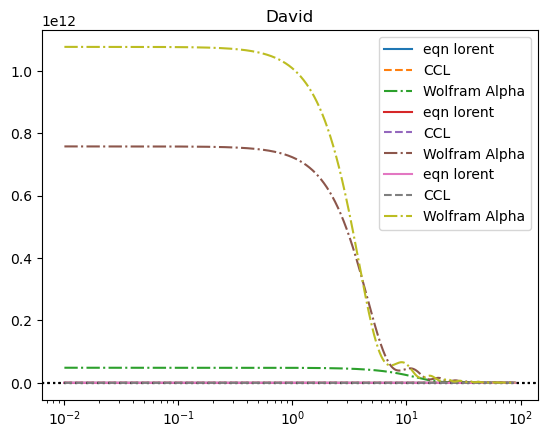

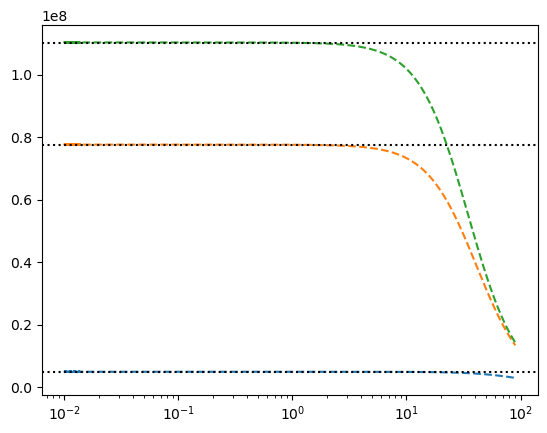

In [177]:
fed_stel_profile.update_precision_fftlog(padding_hi_fftlog=1E3,padding_lo_fftlog=1E-3,
                          n_per_decade=1000,plaw_fourier=-2.)
for i, mass in enumerate(trial_M):
    plt.plot(trial_k, StellarProfile(trial_mass_def, trial_mass_function, alpha=1)._fourier(trial_cosmo, trial_k, mass, 1), label='eqn lorent');
    plt.axhline(mass*fed_stel_profile._f_stell(trial_cosmo, mass), linestyle=':', color='k')
    plt.plot(trial_k, fed_stel_profile.fourier(trial_cosmo, trial_k, mass, 1), '--', zorder=2, label='CCL')
    plt.plot(trial_k, try_stel_fourier[i], linestyle='-.', label='Wolfram Alpha')
plt.title('David')
plt.legend(loc='best', bbox_to_anchor=(1,1))
plt.xscale('log');
plt.figure()
for i, mass in enumerate(trial_M):
   # plt.plot(trial_k, StellarProfile(trial_mass_def, trial_mass_function, alpha=1)._fourier(trial_cosmo, trial_k, mass, 1));
    plt.plot(trial_k, fed_stel_profile.fourier(trial_cosmo, trial_k, mass, 1), '--', zorder=2)
    plt.axhline(mass*fed_stel_profile._f_stell(trial_cosmo, mass), linestyle=':', color='k')
plt.xscale('log');

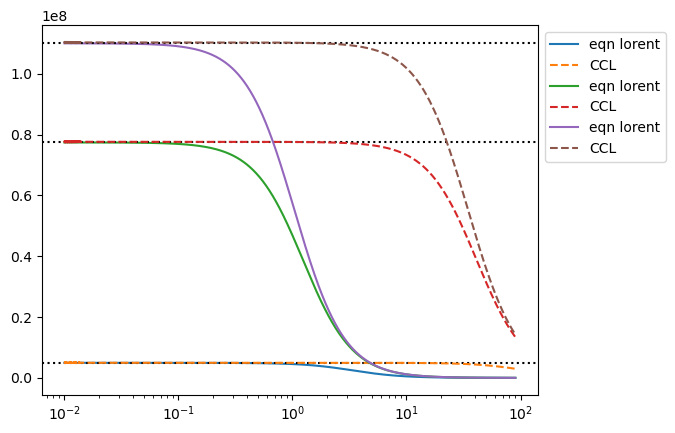

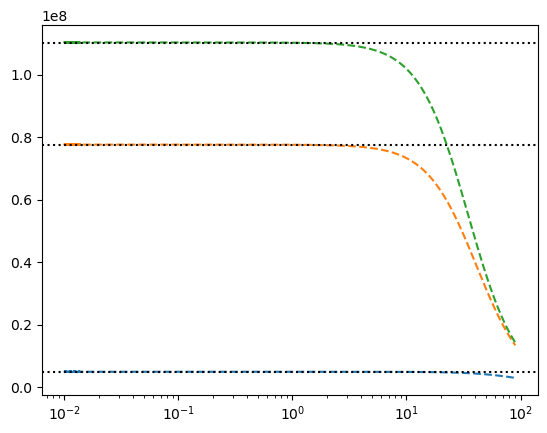

In [181]:
fed_stel_profile.update_precision_fftlog(padding_hi_fftlog=1E3,padding_lo_fftlog=1E-3,
                          n_per_decade=1000,plaw_fourier=-2.)
for i, mass in enumerate(trial_M):
    plt.plot(trial_k, StellarProfile(trial_mass_def, trial_mass_function, alpha=1)._fourier(trial_cosmo, trial_k, mass, 1), label='eqn lorent');
    plt.axhline(mass*fed_stel_profile._f_stell(trial_cosmo, mass), linestyle=':', color='k')
    plt.plot(trial_k, fed_stel_profile.fourier(trial_cosmo, trial_k, mass, 1), '--', zorder=2, label='CCL')
  #  plt.plot(trial_k, try_stel_fourier[i], linestyle='-.', label='Wolfram Alpha')
plt.legend(loc='best', bbox_to_anchor=(1,1))
plt.xscale('log');
plt.figure()
for i, mass in enumerate(trial_M):
   # plt.plot(trial_k, StellarProfile(trial_mass_def, trial_mass_function, alpha=1)._fourier(trial_cosmo, trial_k, mass, 1));
    plt.plot(trial_k, fed_stel_profile.fourier(trial_cosmo, trial_k, mass, 1), '--', zorder=2)
    plt.axhline(mass*fed_stel_profile._f_stell(trial_cosmo, mass), linestyle=':', color='k')
plt.xscale('log');

# Delete Below

In [33]:
listt = ['g','b','b']
array = np.zeros(np.shape(listt)).tolist()
np.shape(listt) == np.shape(array)
#array
array[0] = 'g'
array

['g', 0.0, 0.0]

In [15]:
x = ('g','b','v')
list(x)

TypeError: 'list' object is not callable

In [51]:
help(inspect.getmembers)

Help on function getmembers in module inspect:

getmembers(object, predicate=None)
    Return all members of an object as (name, value) pairs sorted by name.
    Optionally, only return members that satisfy a given predicate.



In [ ]:
# python -> inspect
# self.divide_p

In [37]:
x = [np.array([2,4,2]), np.array([3,6,1])]